In [3]:
def is_anagram(s, t):
    if len(s) != len(t): return False
    return sorted(s) == sorted(t)

s = "anagram"
t = "nagaram"
print(is_anagram(s, t))
### O(NlogN)

True


In [5]:
# O(N)

def is_anagram(s, t):
    if len(s) != len(t): return False
    
    d1, d2 = {}, {}
    for item in s:
        d1[item] = d1.get(item, 0) + 1
    for item in t:
        d2[item] = d2.get(item, 0) + 1
    
    return d1 == d2

s = "anagram"
t = "nagaram"
print(is_anagram(s, t))

True


In [8]:
# a + b + c = 0 => -a - b = c

def threesum(nums):
    if len(nums) < 3: return []
    
    nums.sort()
    out = set()
    
    for i, a in enumerate(nums):
        
        if i > 0 and a == nums[i-1]:
            continue
            
        d = {}
        for x in nums[i:]:
            if x not in d:
                d[-a-x] = 1
            else:
                out.add((a, -a-x, x))
                
    return list(map(list, out))

In [10]:
nums = [-1, 0, 1, 2, -1, -4]

print(threesum(nums))

[[-1, 0, 1], [-1, -1, 2]]


In [15]:
def max_window_sliding(nums, k):
    if not nums: nums = []
    
    window = []
    out = []
    for i, x in enumerate(nums):
        # 移除不在窗口内的值
        if i-k > 0 and i-k >= window[0]:
            window.pop(0)
            
        while window and x >= nums[window[-1]]:
            window.pop()
            
        window.append(i)
        
        if i >= k-1:
            out.append(nums[window[0]])
    return out

In [17]:
nums = [1,3,-1,-3,5,3,6,7]

print(max_window_sliding(nums, k=4))

## O(kN)

[3, 5, 5, 6, 7]


In [12]:
from graphviz import Digraph
import uuid
from random import sample

# 二叉树类
class BTree(object):

    # 初始化
    def __init__(self, data=None, left=None, right=None):
        self.data = data    # 数据域
        self.left = left    # 左子树
        self.right = right  # 右子树
        self.dot = Digraph(comment='Binary Tree')
        self.iter_num = 0
        
    @classmethod
    def from_list(cls, l):
        # [5,1,4,None,None,3,6]
        root = BTree(l[0])
        last_node = root
        empty_node = []
        for i in l[1:]:
            if last_node.iter_num == 2:
                last_node = empty_node.pop(0)
                
            node = BTree(i)
            
            if last_node.left is None and last_node.iter_num < 2:
                if i is not None:
                    last_node.left = node
                    empty_node.append(node)
            elif last_node.right is None and last_node.iter_num < 2:
                if i is not None:
                    last_node.right = node
                    empty_node.append(node)
                    
            last_node.iter_num += 1
                
        return root

    # 前序遍历
    def preorder(self):

        if self.data is not None:
            print(self.data, end=' ')
        if self.left is not None:
            self.left.preorder()
        if self.right is not None:
            self.right.preorder()

    # 中序遍历
    def inorder(self):
        if self.left is None and self.right is None:
            return [self.data]
        elif self.left is None:
            return [] + [self.data] + self.right.inorder()
        elif self.right is None:
            return self.left.inorder() + [self.data] + []
        else:
            return self.left.inorder() + [self.data] + self.right.inorder()
#         if self.left is not None:
#             self.left.inorder()
#         if self.data is not None:
#             self.data
#         if self.right is not None:
#             self.right.inorder()

    # 后序遍历
    def postorder(self):
        
        if self.left is not None:
            self.left.postorder()
        if self.right is not None:
            self.right.postorder()
        if self.data is not None:
            print(self.data, end=' ')

    # 层序遍历
    def levelorder(self):

        # 返回某个节点的左孩子
        def LChild_Of_Node(node):
            return node.left if node.left is not None else None
        # 返回某个节点的右孩子
        def RChild_Of_Node(node):
            return node.right if node.right is not None else None

        # 层序遍历列表
        level_order = []
        # 是否添加根节点中的数据
        if self.data is not None:
            level_order.append([self])

        # 二叉树的高度
        height = self.height()
        if height >= 1:
            # 对第二层及其以后的层数进行操作, 在level_order中添加节点而不是数据
            for _ in range(2, height + 1):
                level = []  # 该层的节点
                for node in level_order[-1]:
                    # 如果左孩子非空，则添加左孩子
                    if LChild_Of_Node(node):
                        level.append(LChild_Of_Node(node))
                    # 如果右孩子非空，则添加右孩子
                    if RChild_Of_Node(node):
                        level.append(RChild_Of_Node(node))
                # 如果该层非空，则添加该层
                if level:
                    level_order.append(level)

            # 取出每层中的数据
            for i in range(0, height):  # 层数
                for index in range(len(level_order[i])):
                    level_order[i][index] = level_order[i][index].data

        return level_order

    # 二叉树的高度
    def height(self):
        # 空的树高度为0, 只有root节点的树高度为1
        if self.data is None:
            return 0
        elif self.left is None and self.right is None:
            return 1
        elif self.left is None and self.right is not None:
            return 1 + self.right.height()
        elif self.left is not None and self.right is None:
            return 1 + self.left.height()
        else:
            return 1 + max(self.left.height(), self.right.height())

    # 二叉树的叶子节点
    def leaves(self):

        if self.data is None:
            return None
        elif self.left is None and self.right is None:
            print(self.data, end=' ')
        elif self.left is None and self.right is not None:
            self.right.leaves()
        elif self.right is None and self.left is not None:
            self.left.leaves()
        else:
            self.left.leaves()
            self.right.leaves()

    # 利用Graphviz实现二叉树的可视化
    def print_tree(self, save_path='./Binary_Tree.png', label=False):

        # colors for labels of nodes
        colors = ['skyblue', 'tomato', 'orange', 'purple', 'green', 'yellow', 'pink', 'red']

        # 绘制以某个节点为根节点的二叉树
        def print_node(node, node_tag):
            # 节点颜色
            color = sample(colors,1)[0]
            if node.left is not None:
                left_tag = str(uuid.uuid1())            # 左节点的数据
                self.dot.node(left_tag, str(node.left.data), style='filled', color=color)    # 左节点
                label_string = 'L' if label else ''    # 是否在连接线上写上标签，表明为左子树
                self.dot.edge(node_tag, left_tag, label=label_string)   # 左节点与其父节点的连线
                print_node(node.left, left_tag)

            if node.right is not None:
                right_tag = str(uuid.uuid1())
                self.dot.node(right_tag, str(node.right.data), style='filled', color=color)
                label_string = 'R' if label else ''  # 是否在连接线上写上标签，表明为右子树
                self.dot.edge(node_tag, right_tag, label=label_string)
                print_node(node.right, right_tag)

        # 如果树非空
        if self.data is not None:
            root_tag = str(uuid.uuid1())                # 根节点标签
            self.dot.node(root_tag, str(self.data), style='filled', color=sample(colors,1)[0])     # 创建根节点
            print_node(self, root_tag)

#         self.dot.render(save_path)                              # 保存文件为指定文件
        return self.dot

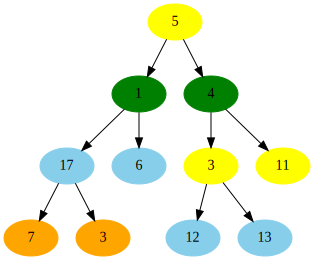

In [25]:
tree = [5,1,4,17,6,3,11,7,3,None,None,12,13]
tree = BTree.from_list(tree)
tree.print_tree()

In [26]:
tree.preorder()

5 1 17 7 3 6 4 3 12 13 11 

In [13]:
def nearest_common_ancestor(root, p, q):
    if root is None or root.data == p or root.data == q: return root
    left = nearest_common_ancestor(root.left, p, q)
    right = nearest_common_ancestor(root.right, p, q)
    return right if left is None else (left if right is None else root)

p, q = 15, 16
print(nearest_common_ancestor(tree, p, q))

None


In [16]:
def is_valid_bst(root):
    l = root.inorder()
    return l == sorted(l)

is_valid_bst(tree)

False

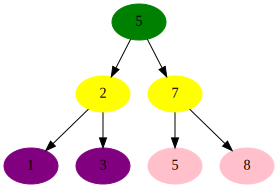

In [23]:
tree = [5, 2, 7, 1, 3, 5, 8]
tree = BTree.from_list(tree)
tree.print_tree()

In [22]:
def is_valid_bst(root, vmin=None, vmax=None):
    if root is None: return True
    if vmin is not None and root.data <= vmin: return False
    if vmax is not None and root.data >= vmax: return False
    return is_valid_bst(root.left, vmin, root.data) and is_valid_bst(root.right, root.data, vmax)

is_valid_bst(tree)

True

In [6]:
# 局部最优解

def max_profit(data):
    if not data: return 0
    profit = 0
    
    for i, v in enumerate(data):
        if i < len(data) -1 and data[i] < data[i+1]:
            profit += data[i+1] - data[i]
    return profit

In [8]:
max_profit([1,2,3,4,5]) 
max_profit([7,1,5,3,6,4])

7

In [41]:
def bfs(root):
    visited = set()
    queue = []
    queue.append(root)
    ret = []
    
    while queue:
        node = queue.pop(0)
        visited.add(node)
        ret.append(node.data)
        
        if node.left and node.left not in visited:
            queue.append(node.left)
        if node.right and node.right not in visited:
            queue.append(node.right)
            
    return ret

In [42]:
tree = [5, 2, 7, 1, 3, 5, 8]
tree = BTree.from_list(tree)
bfs(tree)

[5, 2, 7, 1, 3, 5, 8]

In [23]:
def bfs_by_layer(root):
    visited = set()
    queue = []
    queue.append(root)
    ret = []
    
    while queue:
        level_size = len(queue)
        level_queue = []
        
        for _ in range(level_size):
            node = queue.pop(0)
            level_queue.append(node.data)
            visited.add(node)
            
            if node.left and node.left not in visited:
                queue.append(node.left)
            if node.right and node.right not in visited:
                queue.append(node.right)
        ret.append(level_queue)
    return ret

In [24]:
tree = [5, 2, 7, 1, 3, 5, 8]
tree = BTree.from_list(tree)
bfs_by_layer(tree)

[[5], [2, 7], [1, 3, 5, 8]]

In [27]:
def min_depth(root):
    if not root: return 0
    left = min_depth(root.left)
    right = min_depth(root.right)
    if left == 0 or right == 0:
        return left + right + 1
    else:
        return min(left, right)+1

In [38]:
tree = [5,1,7,3,8, 7, 8, 19, 3]
tree = BTree.from_list(tree)
min_depth(tree)

3

In [39]:
def max_depth(root):
    if not root: return 0
    left = max_depth(root.left)
    right = max_depth(root.right)
    return max(left, right) + 1

In [40]:
tree = [5,1,7,3,8, 7, 8, 19, 3,1,1,1,1,1,1,1,1,]
tree = BTree.from_list(tree)
max_depth(tree)

5